# Install and load dependencies:

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DeepLearning/DLP3_CommentToxicity/train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df[df['identity_hate'] == 1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1


In [ ]:
df.iloc[42]['comment_text']

"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!"

In [ ]:
df.iloc[42][2:]

toxic            1
severe_toxic     0
obscene          1
threat           0
insult           1
identity_hate    1
Name: 42, dtype: object

# 1) Preprocess dataset:

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
MAX_FEATURES = 100000 # number of words in vocabulary

In [ ]:
vectorizer = TextVectorization(
    max_tokens = MAX_FEATURES,
    output_sequence_length = 1800, # maximum possible length of each sentence capped at 1800 words/tokens
    output_mode = "int"
)
vectorizer

In [ ]:
# map vectozizer to vocabulary

vectorizer.adapt(X.values)

In [ ]:
vectorizer("life is great!")[:3] #vectorized representations of sentence entered in

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([306,   9, 275])>

In [ ]:
vectorized_text = vectorizer(X.values) # vectorized representations of X
vectorized_text  # (number of sentences, max number of tokens per sentence) for no words, 0 is filled in

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [ ]:
len(X)

159571

In [ ]:
# MCSHBAP - map, chache, shuffle, batch, prefetch
# initiate data pipeline from either: from_tensor_slices or list_file

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(60000)
dataset = dataset.batch(64)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
batch_X, batch_y = dataset.as_numpy_iterator().next()
batch_X.shape, batch_y.shape

((64, 1800), (64, 6))

In [ ]:
int(len(dataset) * 0.7), int(len(dataset) * 0.2), int(len(dataset) * 0.1)

# 6891 batches for training, 1994 batches for validation, 997 batches for testing

(1745, 498, 249)

In [ ]:
# train, validation and test split of dataset

# train = dataset.take(int(len(dataset)*.7))
# val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
# test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

train = dataset.take(int(len(dataset)*.35))
val = dataset.skip(int(len(dataset)*.35)).take(int(len(dataset)*.1))
test = dataset.skip(int(len(dataset)*.45)).take(int(len(dataset)*.05))

# 2) Create a sequential model:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu')) # 256
model.add(Dense(32, activation='relu')) #128
# Final layer
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          3200032   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 6)                 198       
                                                      

In [ ]:
history = model.fit(train, epochs = 1, validation_data = val)

872/872 [==============================] - 1932s 2s/step - loss: 0.0939 - val_loss: 0.0526


<Figure size 800x500 with 0 Axes>

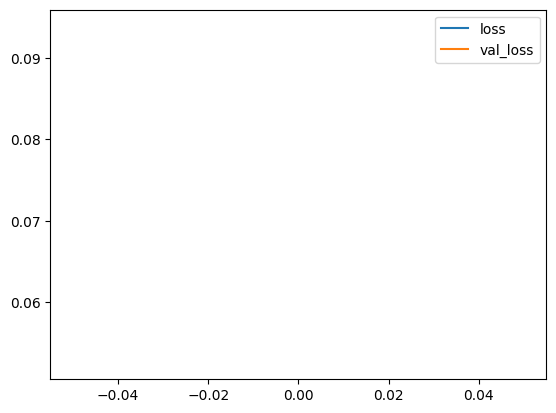

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3) Make predictions:

In [ ]:
input_text = vectorizer('You freaking suck! I am going to hit you.')
res = model.predict(np.array([input_text]))
(res > 0.5).astype(int)

1/1 [==============================] - 1s 1s/step


array([[1, 0, 1, 0, 1, 0]])

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()
res = model.predict(batch_X)
(res > 0.5).astype(int)

2/2 [==============================] - 0s 226ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
 

# 4) Model Evaluation:

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch

    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

2/2 [==============================] - 1s 370ms/step


In [ ]:
print("precision: ", pre.result().numpy())
print("recall: ", re.result().numpy())
print("accuracy: ", acc.result().numpy())

precision:  0.8233276
recall:  0.5889571
accuracy:  0.2016129


# 5) Testing and UI in Gradio:

In [ ]:
# model.save('/content/drive/MyDrive/DeepLearning/DLP3_CommentToxicity/toxicity.h5')
model.save('/content/drive/MyDrive/DeepLearning/DLP3_CommentToxicity/toxicity.keras')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/DeepLearning/DLP3_CommentToxicity/toxicity.h5')

In [ ]:
# !pip install gradio==3.0
!pip install -q gradio

In [ ]:
import gradio as gr

In [ ]:
input_str = vectorizer('hey i freaken hate you! I will kill you')
res = model.predict(np.expand_dims(input_str,0))
res

1/1 [==============================] - 1s 1s/step


array([[0.9507398 , 0.0501619 , 0.72946745, 0.02019929, 0.5753105 ,
        0.0887244 ]], dtype=float32)

In [ ]:
def score_comment(comment):
  vectorized_comment  = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for index, col in enumerate(df.columns[2:-1]):
    text = '{}: {}\n'.format(col, results[0][index]>0.5)

  return text


In [ ]:
# input_str = vectorizer('hey i freaken hate you! I will kill you')
# res = model.predict(np.expand_dims(input_str,0))

# text = ''
# for index, col in enumerate(df.columns[2:]):
#   print('{}: {}\n'.format(col, res[0][index]>0.5))

In [ ]:
interface = gr.Interface(
    fn = score_comment,
    inputs = gr.inputs.Textbox(lines = 2, placeholder = "enter comment to check for toxicity"),
    outputs = 'text'
)

/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.0, however version 4.29.0 is available, please upgrade.
--------


In [ ]:
# interface.launch(share = True)

In [ ]:
import gradio

def greet(name):
  return "Hello " + name + "!"


gradio.Interface(greet, "text", "text").launch(share=True, debug=True)

IMPORTANT: You are using gradio version 3.0, however version 4.29.0 is available, please upgrade.
--------
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().


KeyboardInterrupt: 